In [20]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
import matplotlib as mpl
# Import the requests library.
import requests
#Suppress Warnings
pd.options.mode.chained_assignment = None  # default='warn'

#### Start and End Date for Matplotlib

In [2]:
start_date = "2020-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

# Natural Gas Storage By Region

In [3]:
# UK API
API_Call_US=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R48_BCF.W"
Series_Name_US= "Weekly Lower 48 States Natural Gas Working Underground Storage, Weekly"
Series_ID_US= "NG.NW2_EPG0_SWO_R48_BCF.W"
# Turkish API
API_Call_East=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R31_BCF.W"
Series_Name_East= "Weekly East Region Natural Gas Working Underground Storage, Weekly"
Series_ID_East= "NG.NW2_EPG0_SWO_R31_BCF.W"
#Spanish API
API_Call_MidWest=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R32_BCF.W"
Series_Name_MidWest= "Weekly Midwest Region Natural Gas Working Underground Storage, Weekly"
Series_ID_MidWest= "NG.NW2_EPG0_SWO_R32_BCF.W"
#South Korean API
API_Call_Mountain=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R34_BCF.W"
Series_Name_Mountain= "Weekly Mountain Region Natural Gas Working Underground Storage, Weekly"
Series_ID_Mountain= "NG.NW2_EPG0_SWO_R34_BCF.W"
#Japanese API
API_Call_Pacific=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R35_BCF.W"
Series_Name_Pacific= "Weekly Pacific Region Natural Gas Working Underground Storage, Weekly"
Series_ID_Pacific= "NG.NW2_EPG0_SWO_R35_BCF.W"
#Chinese API
API_Call_SCentral=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=NG.NW2_EPG0_SWO_R33_BCF.W"
Series_Name_SCentral= "Weekly South Central Region Natural Gas Working Underground Storage, Weekly"
Series_ID_SCentral= "NG.NW2_EPG0_SWO_R33_BCF.W"

In [4]:
API_Calls=[API_Call_US, API_Call_East, API_Call_MidWest, API_Call_Mountain, API_Call_Pacific, API_Call_SCentral]
Series_Names=[Series_Name_US, Series_Name_East, Series_Name_MidWest, Series_Name_Mountain, Series_Name_Pacific, Series_Name_SCentral]
Series_IDs=[Series_ID_US, Series_ID_East, Series_ID_MidWest, Series_ID_Mountain, Series_ID_Pacific, Series_ID_SCentral]

list_headers=['Weekly Lower 48 States Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)',
             'Weekly East Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)',
             'Weekly Midwest Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)',
             'Weekly Mountain Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)',
             'Weekly Pacific Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)',
             'Weekly South Central  Region Natural Gas Working Underground Storage, Weekly (Billion Cubic Feet)']
numbers=(1,2,3,4,5,6)
names=('US_Storage','EastCoastStorage','MidWestStorage','MountainStorage','PacificStorage','SouthCentralStorage')

In [28]:
d={}
imports=[] 
bigdf = pd.DataFrame()
US_Storage=pd.DataFrame()
EastCoastStorage=pd.DataFrame()
MidWestStorage=pd.DataFrame()
MountainStorage=pd.DataFrame()
PacificStorage=pd.DataFrame()
SouthCentralStorage=pd.DataFrame()

for i,j,k,m,n,name in zip(API_Calls, Series_Names, Series_IDs, list_headers, numbers, names):
    API_Call=i
    Series_Name= j
    Series_ID= k
    #install EIA package--- pip install EIA_python
    #pip install pyOpenSSL to get around SSL error
    #these are the API keys I set up
    api_key = EIA_key
    api = eia.API(api_key)
    #import data but still need to clean it
    series_search = api.data_by_series(series=Series_ID)
    df = pd.DataFrame(series_search)
    # define a series and pass through api and Series_ID
    def retrieve_time_series(api, Series_ID):
        """
        Return the time series dataframe, based on API and unique Series ID
        """
        #Retrieve Data By Series ID 
        series_search = api.data_by_series(series=Series_ID)
        ##Create a pandas dataframe from the retrieved time series
        global df
        df = pd.DataFrame(series_search)
        return df
    # define another function main to run the script through
    def main():
        """
        Run main script
        """
        #Create EIA API using your specific API key
        api_key = EIA_key
        api = eia.API(api_key)
    #     #Declare desired series ID
    #     Series_ID="PET.WGTSTUS1.W"
        df=retrieve_time_series(api, Series_ID)
        #Print the returned dataframe df
        print(df)
    req = requests.get(i, verify = False)
    #Clean the dataframe by resetting the index because the date is automatically set as the index
    df.reset_index(inplace=True)
    #{original header: new name given}
    df.rename(columns={m:name}, inplace=True)
    #{index:Date}
    df.rename(columns={'index':'Date'}, inplace=True)
    def format_date(row_value):
        #split string on space and slice out the first two parts
        year=row_value.split(" ")[0]
        month=row_value.split(" ")[1][:2]
        day = row_value.split(" ")[1][2:]
        return f"{year}{month}{day}"
    df.Date=df.Date.map(format_date)
    df.Date=pd.to_datetime(df.Date.astype(int), format='%Y%m%d')
    #create a dataframe [[date, name of each country]]
    d=df[['Date', name]]
    #convert date to datetime[64]
    d['Date']=pd.to_datetime(d['Date'], errors='coerce')
    bigdf['Date']=d['Date']
    bigdf[name] = d[name]
bigdf.head()

,Date,US_Storage,EastCoastStorage,MidWestStorage,MountainStorage,PacificStorage,SouthCentralStorage
0,2010-01-01,3117,769,900,195,268,985
1,2010-01-08,2850,703,820,185,257,886
2,2010-01-15,2607,642,750,176,246,793
3,2010-01-22,2521,616,710,171,235,789
4,2010-01-29,2406,582,661,164,221,779


In [6]:
bigdf_date=bigdf[(bigdf['Date']>start_date) & (bigdf['Date']< end_date)]

# Natural Gas Underground Storage By Region

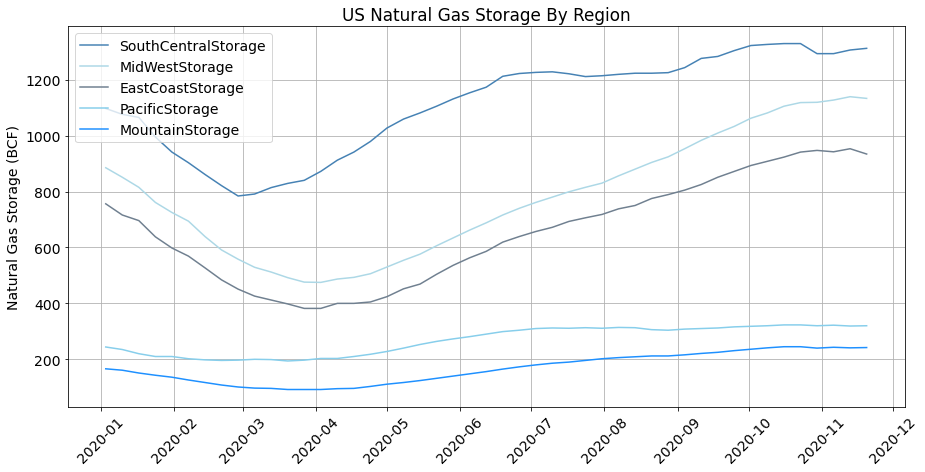

In [29]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
fig, ax=plt.subplots(frameon=False, figsize=(15,7))

Labels=[]
Regions=[ 'SouthCentralStorage', 'MidWestStorage',   'EastCoastStorage',   'PacificStorage', 'MountainStorage' ]
Colors=[   'steelblue',         'lightblue',          'slategrey',             'skyblue',    'dodgerblue']
for i,j in zip(Regions,Colors):
    ax.plot(bigdf_date.Date,bigdf_date[i], color=j)
    line=mlines.Line2D([], [], color=j, label='[i]')
    plt.legend(['SouthCentralStorage', 'MidWestStorage', 'EastCoastStorage', 'PacificStorage', 'MountainStorage'])

_=plt.xticks(rotation=45)
plt.ylabel('Natural Gas Storage (BCF)')
plt.title('US Natural Gas Storage By Region')
plt.savefig("Crude_Storage_Images/NaturalGasStorageRegion.png", bbox_inches='tight')
plt.grid()
plt.show()

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


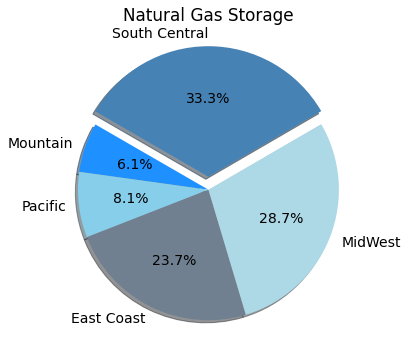

In [27]:
pie_df=bigdf_date[-1:][[  'MountainStorage', 'PacificStorage', 'EastCoastStorage', 'MidWestStorage', 'SouthCentralStorage'  ]]
## Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(pie_df,
    labels=[    'Mountain', 'Pacific',  'East Coast', 'MidWest', 'South Central'],
    colors=[    'dodgerblue', 'skyblue','slategrey', 'lightblue', 'steelblue'],
    explode=[ 0,0,0,0,0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("Natural Gas Storage")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("Crude_Storage_Images/Natural Gas StoragePieChart.png", bbox_inches='tight')
plt.show()